In [4]:
import cv2
import keras
import numpy as np

In [5]:
from keras.models import Sequential 
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras.backend as K

Build a CNN model

In [148]:
K.clear_session()

model = Sequential()
model.add(Convolution2D(32,(3,3), input_shape=(20,20,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(activation="relu", units=128))
model.add(Dense(units = 10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 18, 18, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               331904    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 334,090
Trainable params: 334,090
Non-trainable params: 0
_________________________________________________________________


Prepare the datasets

In [149]:
image = cv2.imread('images/digits.png')
image.shape

(1000, 2000, 3)

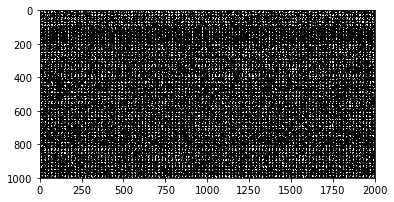

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image,cmap='gray')
plt.show()

In [23]:
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
image_gray.shape

(1000, 2000)

In [151]:
cells = [np.hsplit(row,100) for row in np.vsplit(image,50)]
len(cells)

50

In [152]:
x = np.array(cells)
x.shape

(50, 100, 20, 20, 3)

In [153]:
x_train = x[:,:70].astype(np.float32)
x_test = x[:,70:100].astype(np.float32) 

k = [0,1,2,3,4,5,6,7,8,9]
y_train_1 = np.repeat(k,350)[:,np.newaxis]
y_test_1 = np.repeat(k,150)[:,np.newaxis]

In [154]:
x_train.shape

(50, 70, 20, 20, 3)

In [155]:
x_train = x_train[:,:,:].reshape(3500,20,20,3)
x_train.shape

(3500, 20, 20, 3)

In [156]:
from keras.utils import np_utils
num_classes = 10
y_train = np_utils.to_categorical(y_train_1, num_classes)
y_test = np_utils.to_categorical(y_test_1, num_classes)

In [157]:
y_train.shape

(3500, 10)

In [158]:
y_train[0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [159]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [160]:
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=5)


Epoch 1/5
110/109 [==============================] - 3s - loss: 1.9604 - acc: 0.3105     
Epoch 2/5
110/109 [==============================] - 2s - loss: 1.3088 - acc: 0.5446     
Epoch 3/5
110/109 [==============================] - 2s - loss: 1.0501 - acc: 0.6451     
Epoch 4/5
110/109 [==============================] - 2s - loss: 0.9147 - acc: 0.6899     
Epoch 5/5
110/109 [==============================] - 2s - loss: 0.8662 - acc: 0.7027     
